Elena's school data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sn
import datetime


In [2]:
filn='/Users/juliob/myPythonTools/Datasets_2/ColoradoSchools.xlsx'

In [3]:
df=pd.read_excel( filn )

In [4]:
y=df['Immigrant']


In [5]:
good=np.where( y != '*' )
#plt.plot(y)


In [6]:
print(np.shape(y))

(185,)


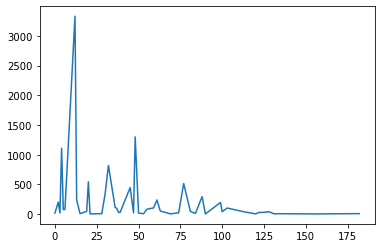

In [7]:
plt.plot(y[good[0]])

In [8]:
columns=df.columns
print(np.shape(columns))

(38,)


In [9]:
qq=np.asarray( df )
print(np.shape(qq))
print( qq[10,:] )
print( (df.iloc[10]))

(185, 38)
[2530 'Rocky Ford R-2' 45 'OTERO' 'Outlying Town' 632 632 5 1 0 471 147 0
 8 632 485 0.767 421 61 150 482 0.666 0.097 0.763 14 87 0 33 '*' 7 '*' 5
 15.0 17.0 12.0 5.0 -7.0 -0.5833333333333334]
District Code                                          2530
District Name                                Rocky Ford R-2
County Code                                              45
County Name                                           OTERO
District Setting                              Outlying Town
K-12 Total Enrollment                                   632
PK-12 Total Enrollment                                  632
American Indian or Alaskan Native                         5
Asian                                                     1
Black or African American                                 0
Hispanic or Latino                                      471
White                                                   147
Native Hawaiian or Other Pacific Islander                 0
Two or More Races

In [10]:
qq=np.asarray(df)
columns=df.columns
G=np.shape(qq)
print(G)
print(columns)

(185, 38)
Index(['District Code', 'District Name', 'County Code', 'County Name',
       'District Setting', 'K-12 Total Enrollment', 'PK-12 Total Enrollment',
       'American Indian or Alaskan Native', 'Asian',
       'Black or African American', 'Hispanic or Latino', 'White',
       'Native Hawaiian or Other Pacific Islander', 'Two or More Races',
       'Total PK-12 Pupil Count', 'Total Minority Count', 'Percent Minority',
       'FREE LUNCH ELIGIBLE', 'REDUCED LUNCH ELIGIBLE', 'PAID LUNCH',
       'FREE AND REDUCED', '% FREE', '% REDUCED', '% FREE AND REDUCED',
       'Gifted and Talented', 'Special Education', 'Online',
       'EL Incl. M1 and M2', 'Homeless', 'Section 504 Handicapped',
       'Immigrant', 'Migrant', 'Home School 2019', 'Home School 2020',
       'Home School 2021', 'Home School 2022', 'Count change from 2021-22',
       '% change from 2021-22'],
      dtype='object')


In [11]:
# "Heal" data from Pandas DataFrame
# Goes row by row (Nrows=G[0])
for idx in np.arange(G[0]):
#for idx in [10]:
    qq0=qq[idx,:]
    #print(qq0)
    bad=np.where( qq0 == '*')  # | df[icol]=='NA' )
    qq0[bad[0]]=-99999.
    #print(qq0)
    qq[idx,:]=qq0
    #print(qq[idx,:])
    

In [12]:
df2 = pd.DataFrame( qq , columns=columns )

In [13]:
print(qq[10,:])
print( (df2.iloc[10]))

[2530 'Rocky Ford R-2' 45 'OTERO' 'Outlying Town' 632 632 5 1 0 471 147 0
 8 632 485 0.767 421 61 150 482 0.666 0.097 0.763 14 87 0 33 -99999.0 7
 -99999.0 5 15.0 17.0 12.0 5.0 -7.0 -0.5833333333333334]
District Code                                          2530
District Name                                Rocky Ford R-2
County Code                                              45
County Name                                           OTERO
District Setting                              Outlying Town
K-12 Total Enrollment                                   632
PK-12 Total Enrollment                                  632
American Indian or Alaskan Native                         5
Asian                                                     1
Black or African American                                 0
Hispanic or Latino                                      471
White                                                   147
Native Hawaiian or Other Pacific Islander                 0
Two or More Races

(0.0, 1.0)

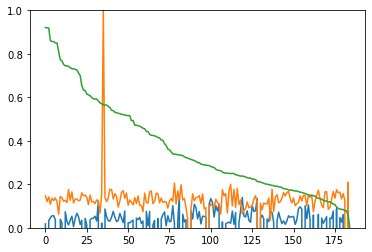

In [14]:
plt.plot( df2["Gifted and Talented"]/df2["PK-12 Total Enrollment"])
plt.plot( df2["Special Education"]/df2["PK-12 Total Enrollment"])
plt.plot( df2["Total Minority Count"]/df2["PK-12 Total Enrollment"])
plt.ylim(0,1)

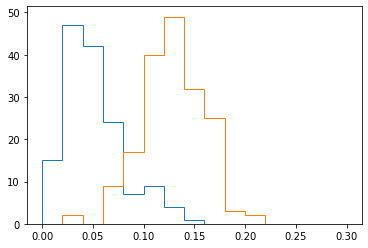

In [15]:
y1 = df2["Gifted and Talented"]/df2["PK-12 Total Enrollment"]
y2 = df2["Special Education"]/df2["PK-12 Total Enrollment"]
y3 = df2["Total Minority Count"]/df2["PK-12 Total Enrollment"]
y4 = df2["Total Minority Count"]/df2["PK-12 Total Enrollment"]
counts1, bins = np.histogram(y1,range=(0,.3),bins=15)
counts2, bins = np.histogram(y2,range=(0,.3),bins=15)
counts3, bins = np.histogram(y3,range=(0,.3),bins=15)
plt.stairs(counts1,bins)
plt.stairs(counts2,bins)

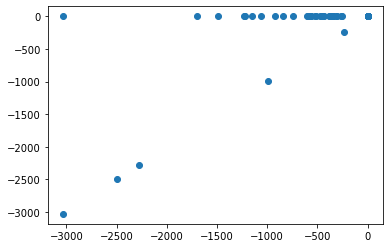

In [16]:
plt.scatter(y1,y2)
#plt.xlim(0,.3)
#plt.ylim(0,.3)
